In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
import combinators.model as model
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example
import examples.ais.image_density as image_density

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
from scipy.misc import imread
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

img_ary = imread('examples/ais/probtorch-logo-bw.png', mode='L')
img_ary = gaussian_filter(img_ary, sigma=1)

In [6]:
ANNEALING_STEPS = 50

In [7]:
BATCH_SHAPE = (1000,)

In [8]:
proposal = image_density.AnnealingProposal(image_density.ImageProposal(batch_shape=BATCH_SHAPE), ANNEALING_STEPS)

In [9]:
target = model.Compose(image_density.ProbtorchLogoDensity(batch_shape=BATCH_SHAPE), proposal)

In [10]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('ProbtorchLogoDensity.ImageProposal/ImageProposal', 'ImageProposal'), moves=ANNEALING_STEPS)

In [11]:
annealed_points, trace, log_weight = ais(data={'image': torch.Tensor(img_ary)})

In [12]:
annealed_points

tensor([[ 0.8692, -1.1841],
        [ 0.4833,  0.0643],
        [-0.1026, -1.0016],
        ...,
        [-0.2969, -0.7619],
        [-0.0546, -1.5329],
        [-0.5544, -1.4626]])

In [13]:
log_weight

tensor([-0.1952,  0.3057,  2.1612,  5.4186,  1.9493,  4.1834,  0.8116, -0.4628,
         0.7057,  2.4691,  1.9957,  0.2215,  1.3301,  0.3407,  1.4054,  2.3947,
         1.8177,  1.2754, -0.5559,  0.5554, -0.4978, -0.0422, -0.4360,  1.7801,
         0.3543, -0.3313,  3.3655,  5.1616,  0.3401, -1.7151, -0.0714,  0.1057,
        -0.4090,  2.8026,  4.5878,  1.1701,  1.5937, -0.1350, 10.5832, -0.8007,
        -1.4316,  0.1773, -0.3088,  1.5186,  0.7234,  1.6295,  0.1889, -1.1720,
         1.2260,  1.2386,  3.9992,  4.7447,  4.9331, -0.7019,  1.8001, -0.0150,
         0.0676, -0.4390,  2.5118,  0.2490,  1.0276,  1.7310,  0.9792,  0.0083,
         0.4202,  0.2728,  0.2339,  0.1709,  4.7318,  3.1152, -0.0488,  2.2991,
         1.1012,  3.6829,  0.4044,  0.6944,  2.4018,  0.3220,  4.1019,  2.2280,
        -0.0278,  1.9594,  3.0136,  1.0402, -0.0846, -0.2688,  0.7980,  0.1285,
         0.5394,  0.4810,  0.7735,  2.1980,  0.5397,  0.1017,  0.5237,  0.7806,
         1.5382,  1.4525,  0.9854,  0.07

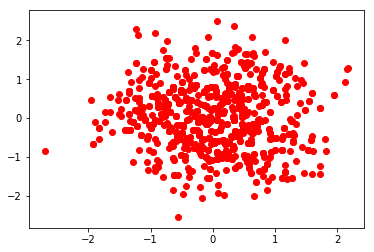

In [14]:
plt.scatter(annealed_points[:, 0], annealed_points[:, 1], c='r')